# Bank-Marketing
Creating a logistic regression model using python on a bank data, to find out if the customer have subscribed to a specific plan or not.

## Problem Statement
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In this project, you need to build a model for deciding whether a campaign will be successful in getting a client to sign up for the term deposits.

## Dataset
The dataset is in the form of a csv file and the link to download is given below:
https://cdn.upgrad.com/UpGrad/temp/e4993de3-06a6-4c7d-b12f-774ce36b592e/bank.csv

## Data Description
Bank client data

- age (numeric)
- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric)
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")


### Data related to the last contact of the current campaign

- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)

### Other attributes:

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):

- y: has the client subscribed a term deposit? (binary: "yes","no")

## Objectives
You are required to prepare a well-commented an interactive python notebook as your solution to this problem statement. The notebook must meet the following objectives:

- Clean the data and drop useless columns.
- Make an EDA report, i.e., perform a univariate and bivariate analysis. Also, derive new features based on the given features, remove outliers and correlated variables if necessary.
- Visualize the distributions of various features and correlations between them.
- Perform feature engineering to extract the correct features for the model.
- Build a logistic regression model
- Evaluate the model used.

## Model Evaluation
When you're done with the model building and residual analysis and have made predictions on the test set, just make sure you use y_test and y_pred.

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set. Also, remember if the VIF for the selected features is not coming high always check the p-values of the variables before applying the model on test data.

# Logistic Regression Assignment

## Total Marks: 100

## Instructions:
- This assignment is designed to test your ability to build and evaluate a logistic regression model using the given dataset.
- Follow the steps provided and answer each question with proper analysis and visualizations.
- Ensure that you add comments explaining each step in your code.
- Submit your completed Jupyter Notebook file.

---








### Submission Guidelines:
- Ensure your notebook is well-structured and properly commented.
- Submit the completed Jupyter Notebook (.ipynb) file.




## Grading Criteria:
1. **Data Loading & Inspection** - 10 marks
2. **Data Cleaning** - 10 marks
3. **Descriptive Statistics** - 10 marks
4. **Univariate Analysis** - 10 marks
5. **Bivariate Analysis** - 10 marks
6. **Multivariate Analysis** - 10 marks
7. **Heatmap & Correlation Analysis** - 10 marks
8. **Building Logistic Regression Model** - 15 marks
9. **Model Evaluation & Interpretation** - 10 marks
10. **Final Conclusion** - 5 marks

---


## Questions:

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder




### 1. Load the Data (5 marks)
- Load the dataset into a Pandas DataFrame.
- Display the first five rows to understand the structure.
- Check for missing values.

In [2]:
df = pd.read_csv("C:\\PythonWS\\LogisticRegression\\Data\\bank.csv")
df.head(5)
display(df.isnull().sum())
display(df['y'].value_counts())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

y
no     4000
yes     521
Name: count, dtype: int64


### 2. Data Inspection (5 marks)
- Display the data types of all columns.
- Check for duplicate values and handle them if necessary.
- Identify the target variable.

In [3]:
df.info()

# display(df.columns)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print(df.columns.shape)
print(f" list of numerical columns {num_cols} and length {len(num_cols)}")
print(f"list of categorical columns {cat_cols} and length {len(cat_cols)}")


def check_zero_values(df, cols):
    for col in cols:
        print(f"{col}: {df[df[col] == 0].shape[0]} zero values")
        

check_zero_values(df, num_cols)
# OK to have zero values for previous and balance columns
# Categorical columns check for missing values
display(df[cat_cols].isnull().sum())
# standardize the data for categorical columns (remove spaces and convert to lower case)
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip().str.lower())
display(df[cat_cols].head(5))

display(df['y'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
(17,)
 list of numerical columns Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', '

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
dtype: int64

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


y
no     4000
yes     521
Name: count, dtype: int64


### 3. Data Cleaning (10 marks)
- Handle missing values appropriately.
- Check for outliers using box plots.
- Perform any necessary transformations.

 values after capping count    4521.000000
mean       41.123203
std        10.416974
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        73.000000
Name: age, dtype: float64
 values before capping count    4521.000000
mean       41.123203
std        10.416974
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        73.000000
Name: age, dtype: float64


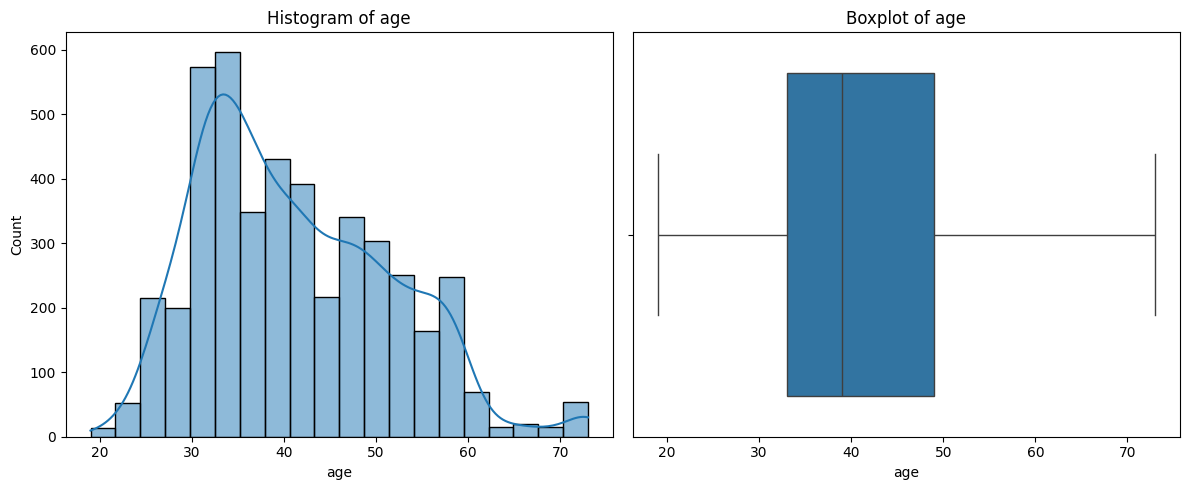

In [4]:
df[cat_cols].isnull().sum()
# check for missing values in numerical columns
df[num_cols].isnull().sum()

# capping the outliers for numerical columns
def cap_outliers(df, column):
    df_capped = df.copy()
    """Caps outliers in a given column of the DataFrame."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped[column] = df[column].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )
    return df_capped

# Transformation of the data
# capping the outliers for numerical columns   

df= cap_outliers(df, 'age')
df= cap_outliers(df, 'balance')


print(f" values after capping {df['age'].describe()}")

# for numerical columns, we can use the describe function to get a summary of the data
def histogram_boxplot(df, column):
    """Creates a side-by-side histogram and boxplot for a given column."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Histogram
    sns.histplot(df[column], bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

# for categorical columns, we can use countplot to visualize the distribution of categories
def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()
    display(df[column].value_counts(normalize=True))


print(f" values before capping {df['age'].describe()}")
histogram_boxplot(df, 'age')





### 4. Descriptive Statistics (10 marks)
- Generate summary statistics for numerical variables.
- Provide insights on the distribution of key variables.

### Observations from univarient analysis
1. AGE : Mean age groups are in the range from 35-50Years..More than 75years are outliners.
2. Folks average balances maintained are less than 10K?
3. Average Duration spend on individual is less than 400seconds
4. Job distribution are spread across all secions, unknown jobs are pretty less however majority(40%) of the jobs are from blue color & Manangement.
5. Majority of the Folks are married guys(60%), Single & diverse folks are less than 35%
6. Majority of the folks education qualification is secondary(51%), terniary (29%), and around 10% of primary education...unknowns are very less(<4%).
7. Distribution has <2% of the folks has credit default all others have good credit.
8. distribution has approxiate equal housing distribution
9. 15% of the folks has loan distribution with yes, all others has no loan disbursement.
10. 65% of the folks has been contacted via Cellular and 6% are contacted via telephone..It has 30% of the distribution does't have values related to how they contacted customer.
11. Recently contacted months are from May,july,Aug & june.
12. outcome of the previous marketing campaign(poutcome) is many are unknown(82%). I think we can take off this feature as data is not available.
13. Distribution of output(client subscribed a term deposit) target has majority data of No (88%) and remaining data of yes (12%)

### 5. Univariate Analysis (10 marks)
- Perform and visualize univariate analysis on each column separately.
- Use histograms, boxplots, and value counts where applicable.

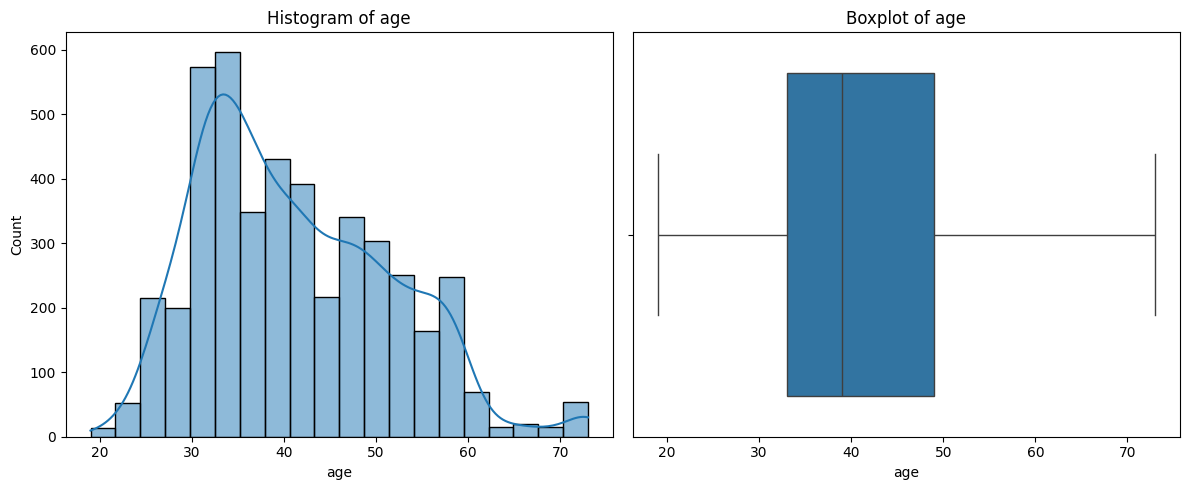

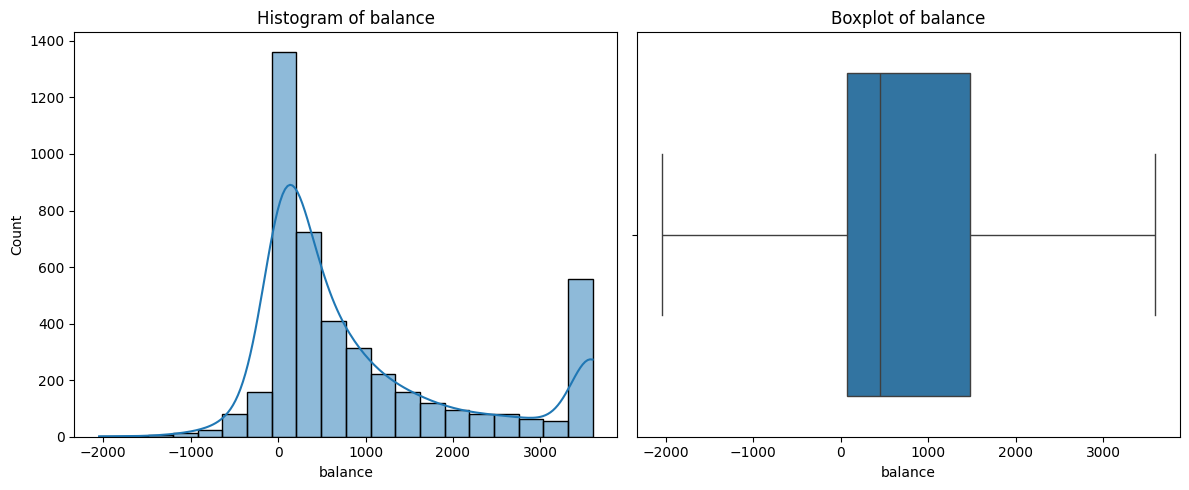

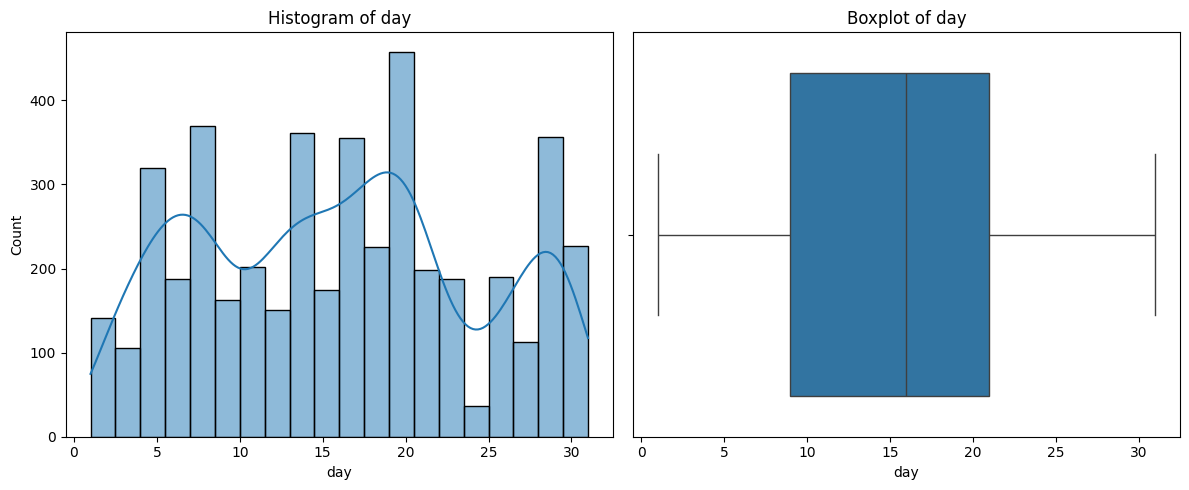

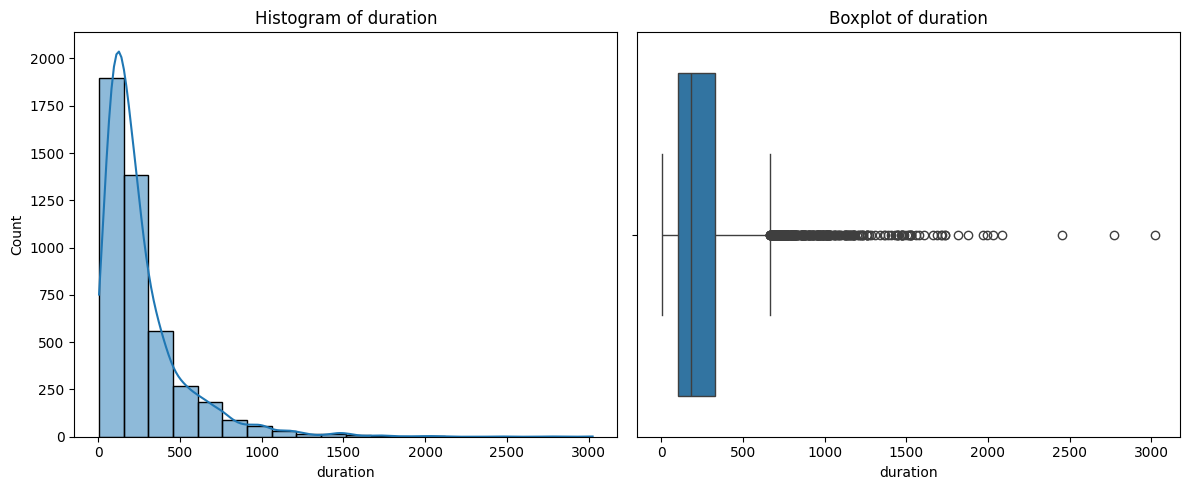

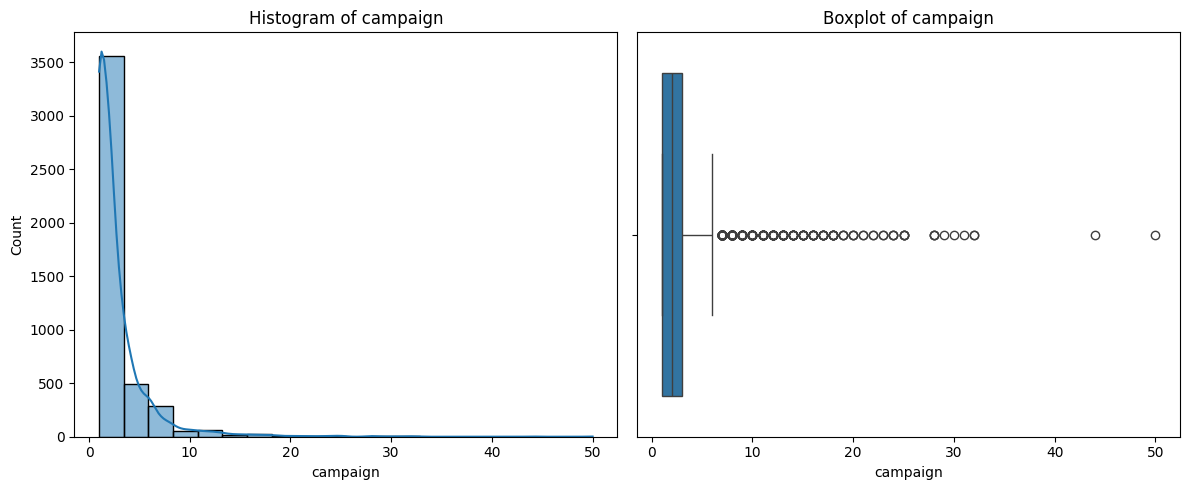

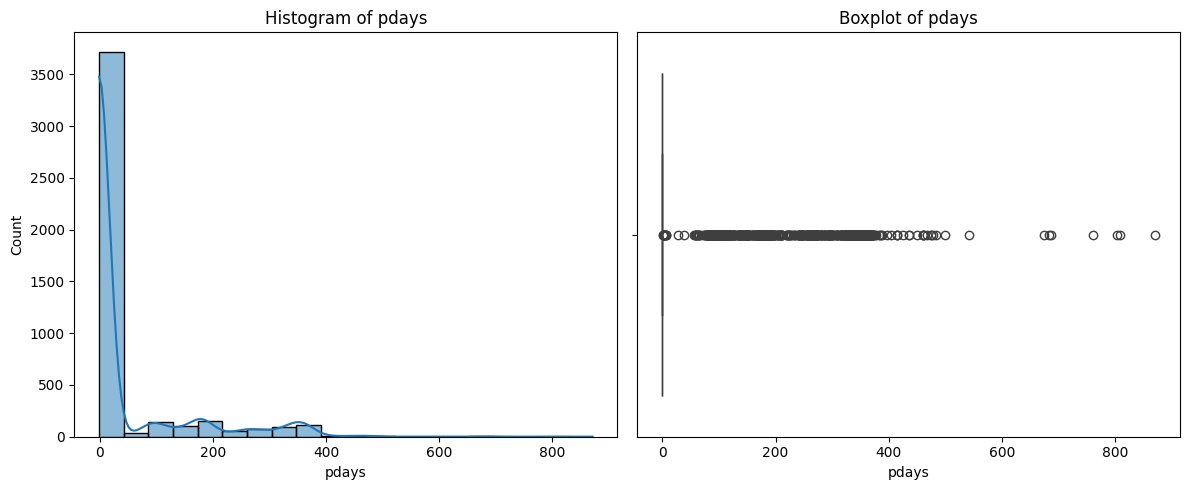

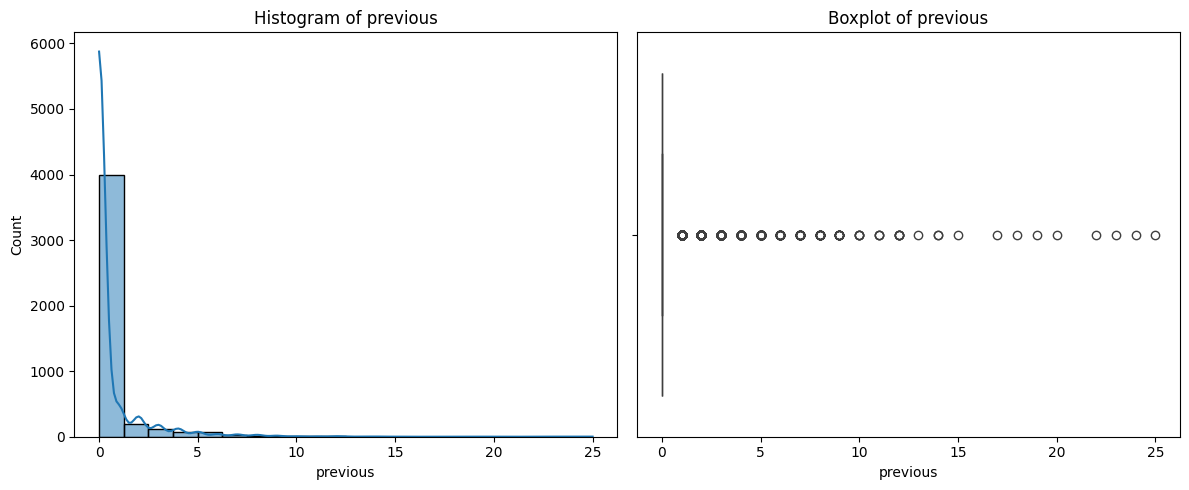

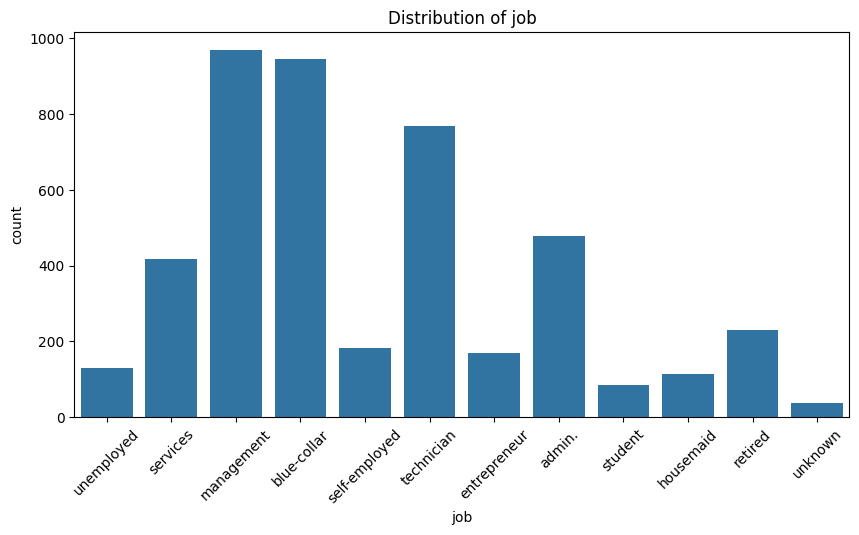

job
management       0.214333
blue-collar      0.209246
technician       0.169874
admin.           0.105729
services         0.092236
retired          0.050874
self-employed    0.040478
entrepreneur     0.037160
unemployed       0.028312
housemaid        0.024773
student          0.018580
unknown          0.008405
Name: proportion, dtype: float64

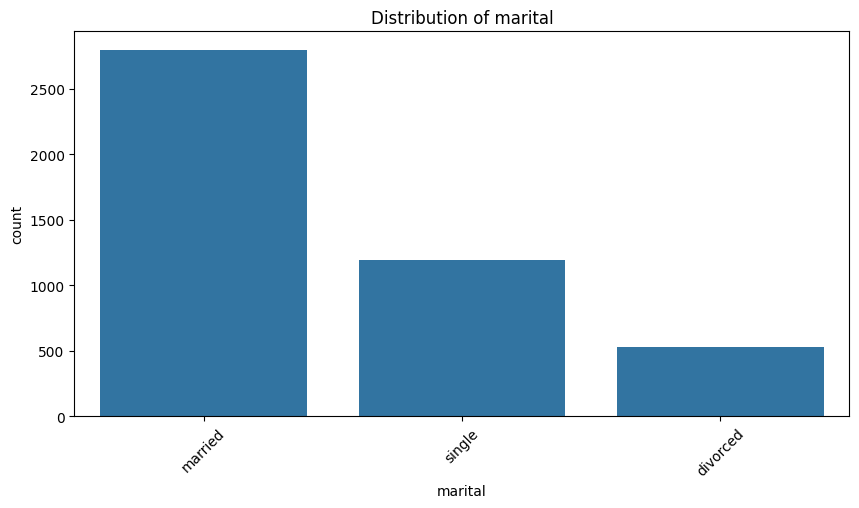

marital
married     0.618668
single      0.264543
divorced    0.116788
Name: proportion, dtype: float64

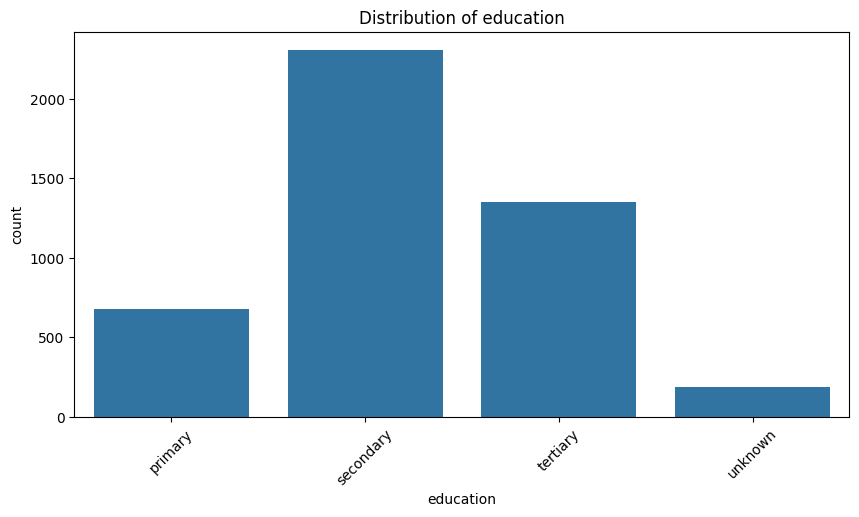

education
secondary    0.510064
tertiary     0.298607
primary      0.149967
unknown      0.041363
Name: proportion, dtype: float64

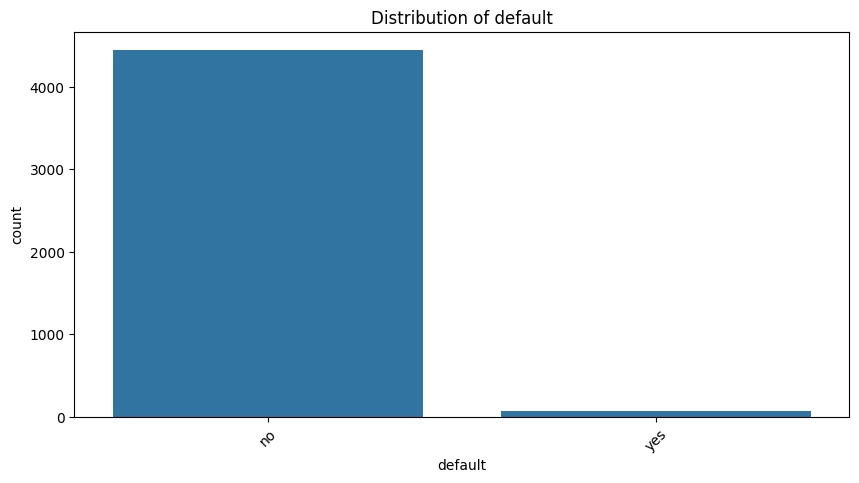

default
no     0.98319
yes    0.01681
Name: proportion, dtype: float64

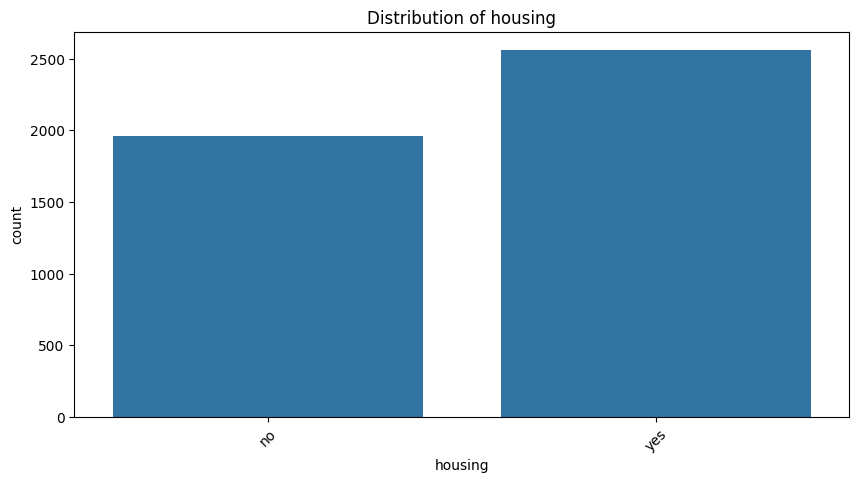

housing
yes    0.566025
no     0.433975
Name: proportion, dtype: float64

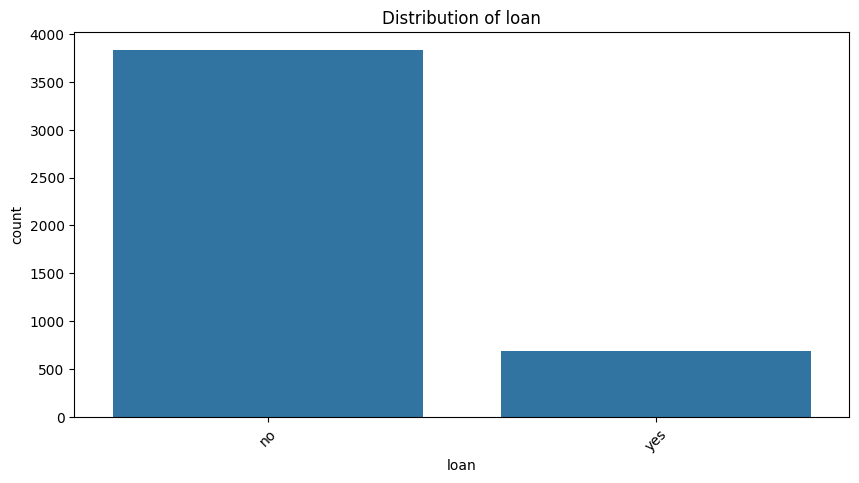

loan
no     0.847158
yes    0.152842
Name: proportion, dtype: float64

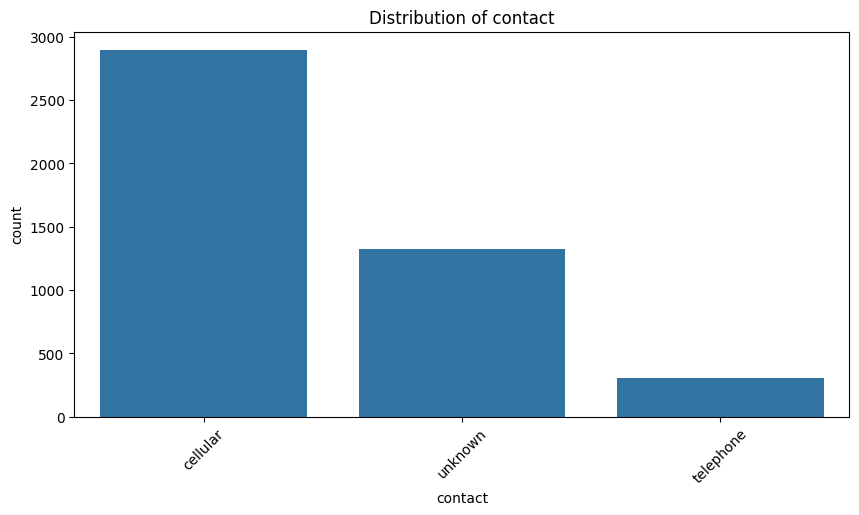

contact
cellular     0.640566
unknown      0.292856
telephone    0.066578
Name: proportion, dtype: float64

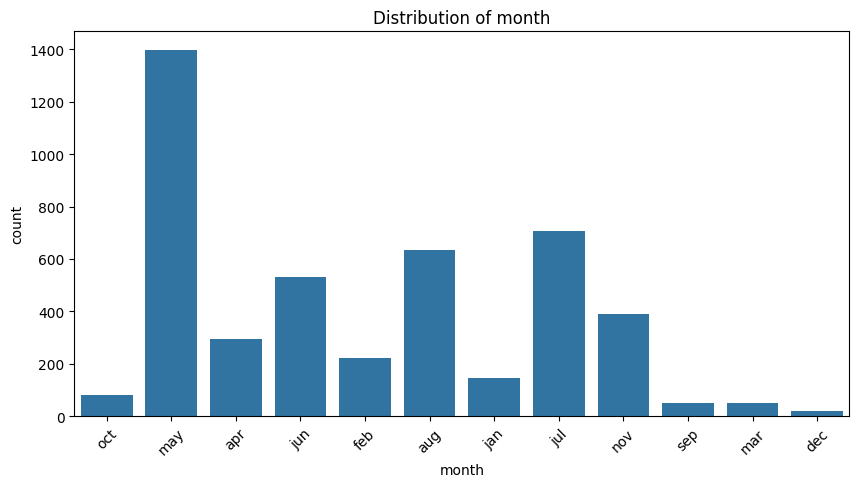

month
may    0.309224
jul    0.156160
aug    0.140013
jun    0.117452
nov    0.086043
apr    0.064809
feb    0.049104
jan    0.032736
oct    0.017695
sep    0.011502
mar    0.010838
dec    0.004424
Name: proportion, dtype: float64

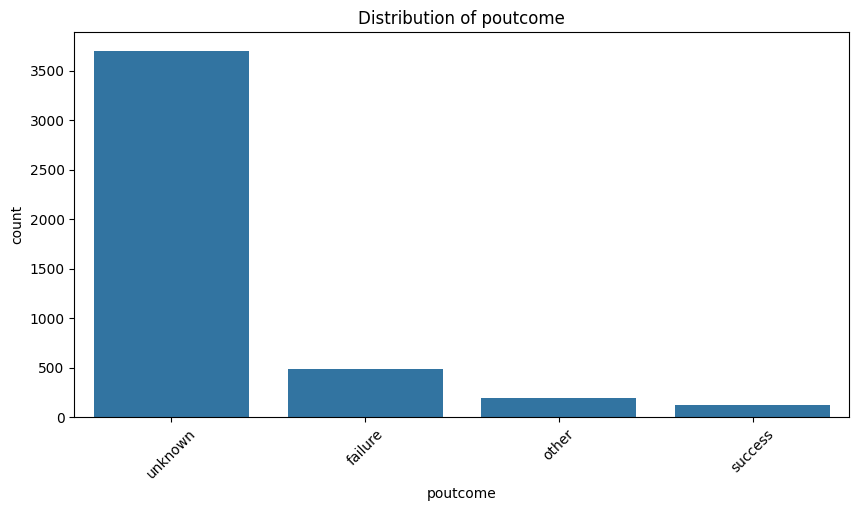

poutcome
unknown    0.819509
failure    0.108383
other      0.043574
success    0.028534
Name: proportion, dtype: float64

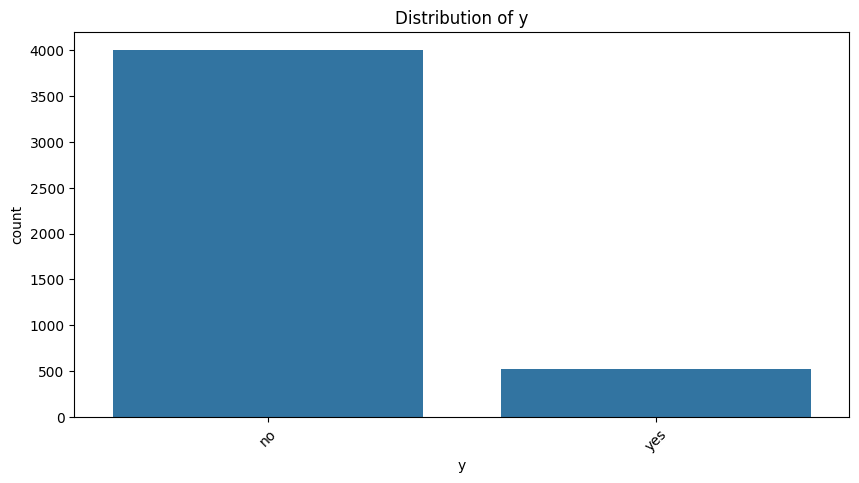

y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64

In [5]:
# for numerical columns created histogram and boxplot
for col in num_cols:
    histogram_boxplot(df, col)

# for categorical columns created countplot and value counts
for col in cat_cols:
    plot_categorical_distribution(df, col)



### 6. Bivariate Analysis (10 marks)
- Analyze the relationship of each independent variable with the target variable.
- Use scatter plots, bar plots, and box plots for visualization.

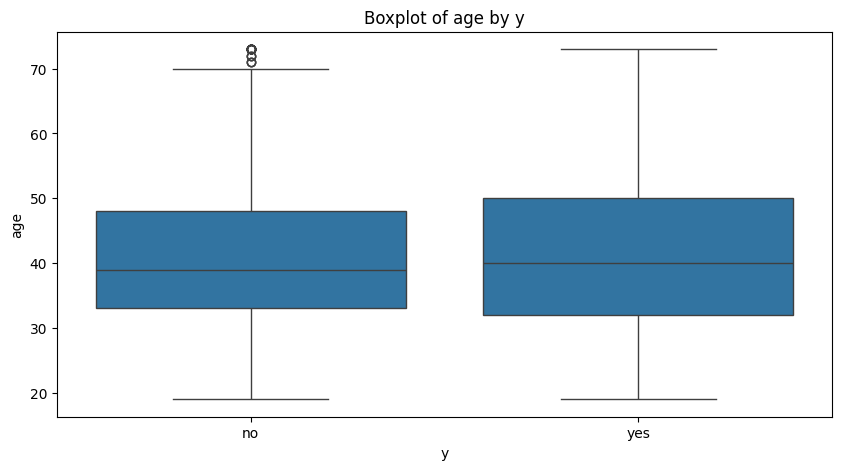

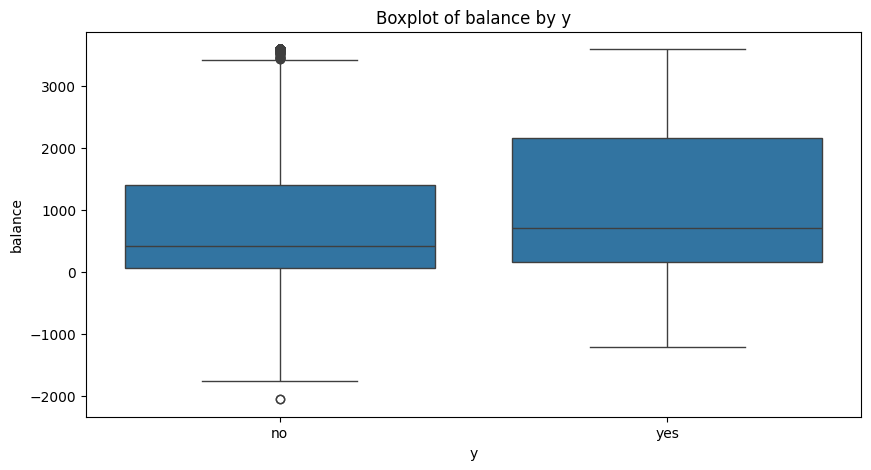

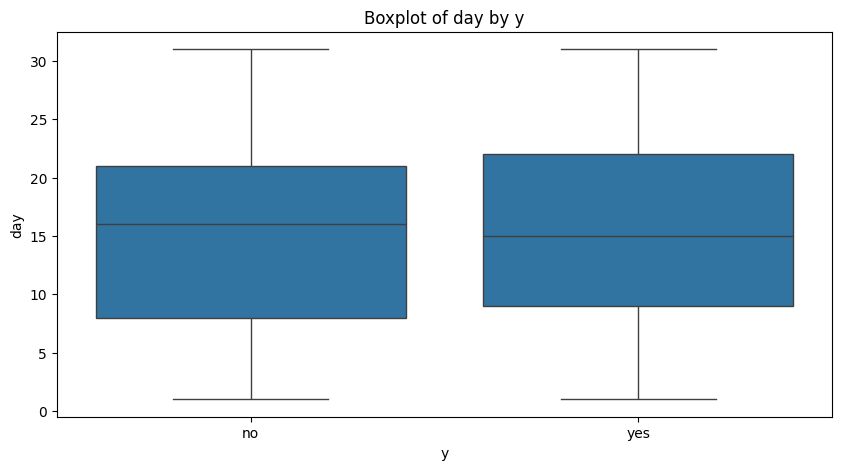

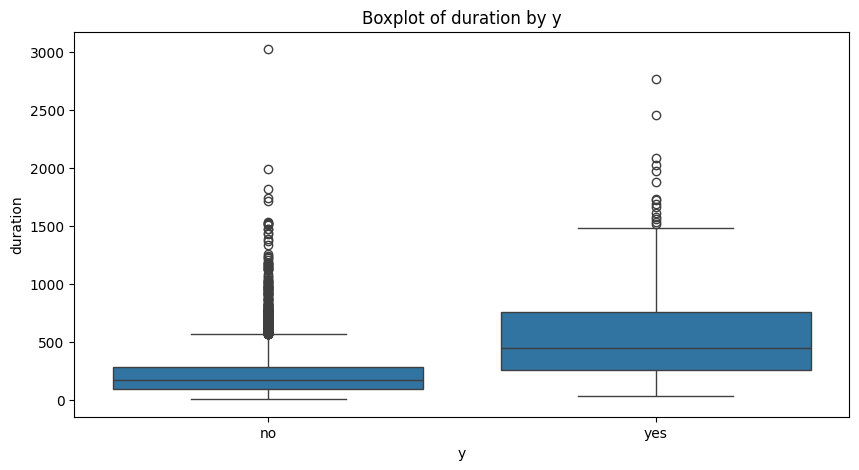

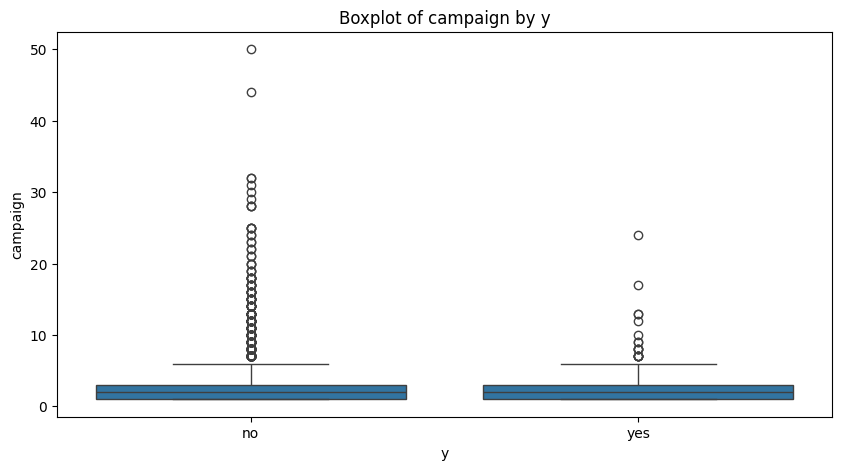

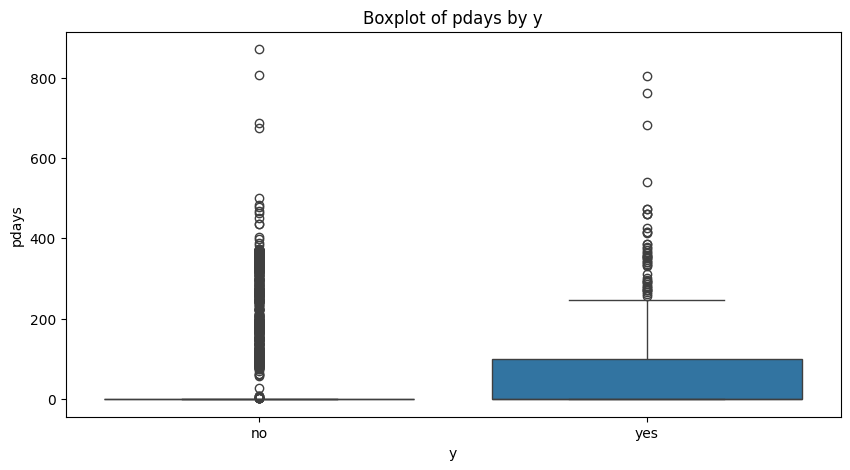

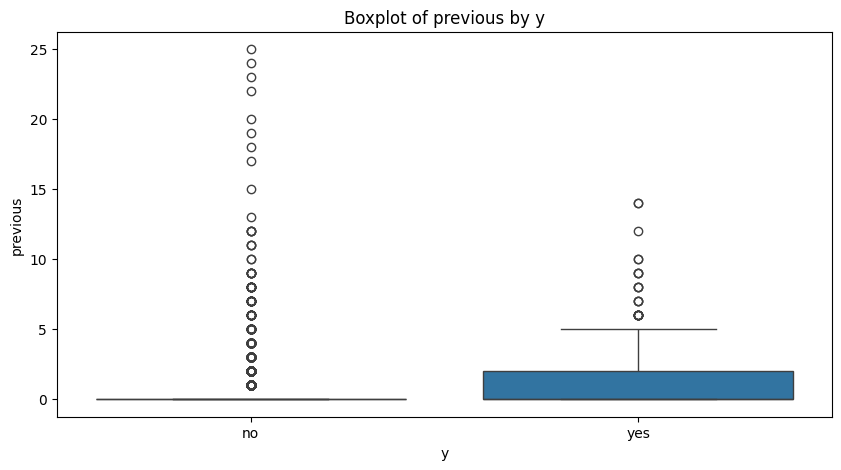

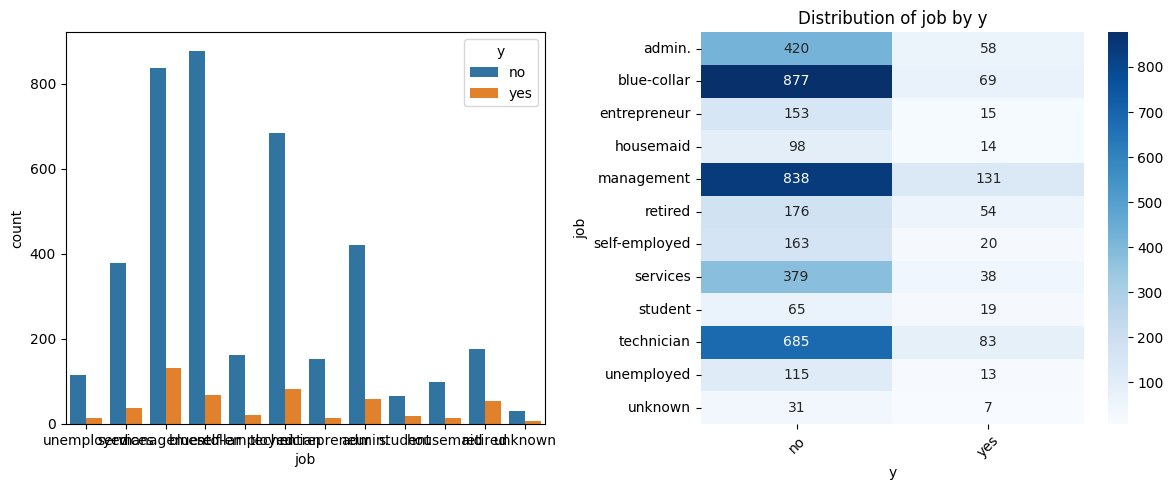

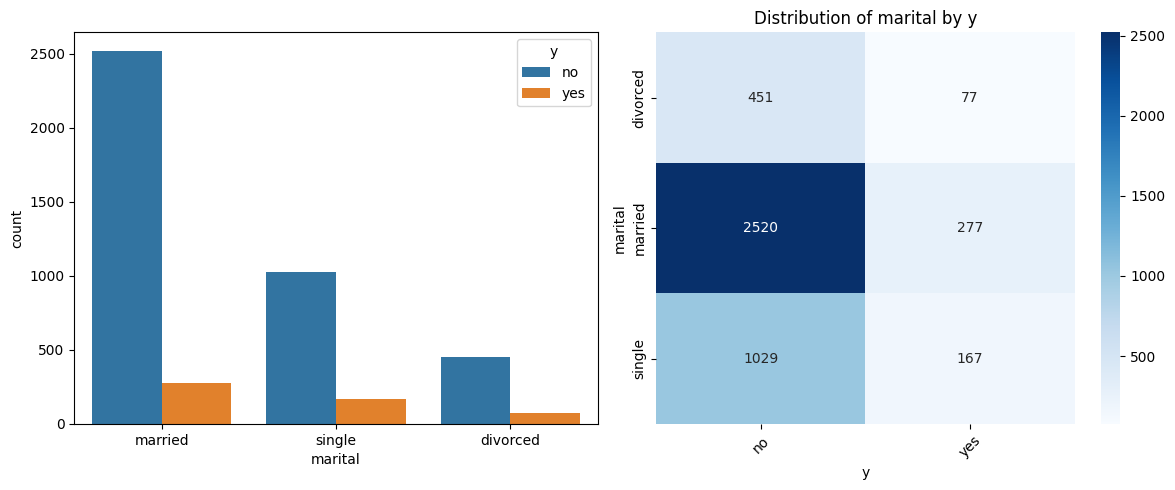

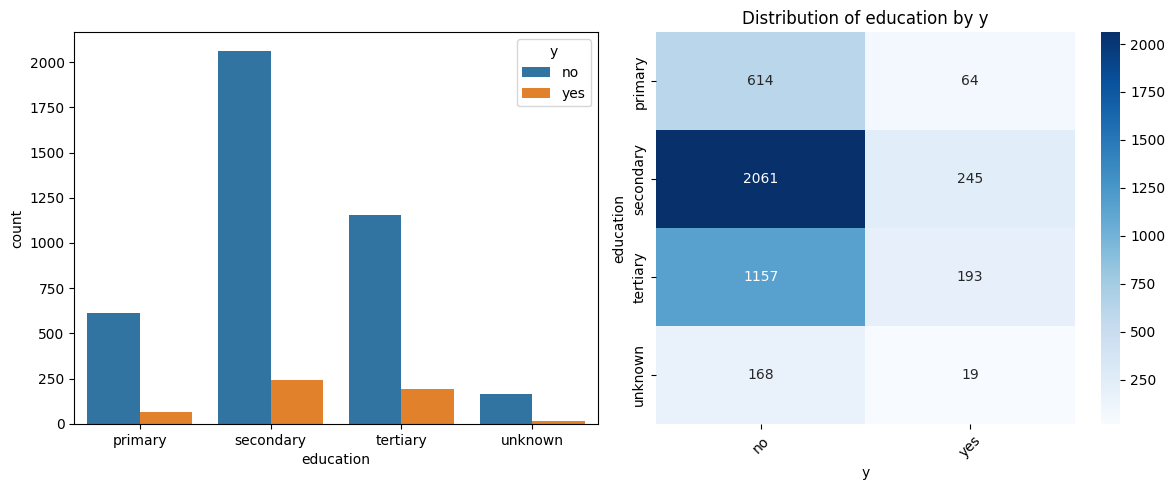

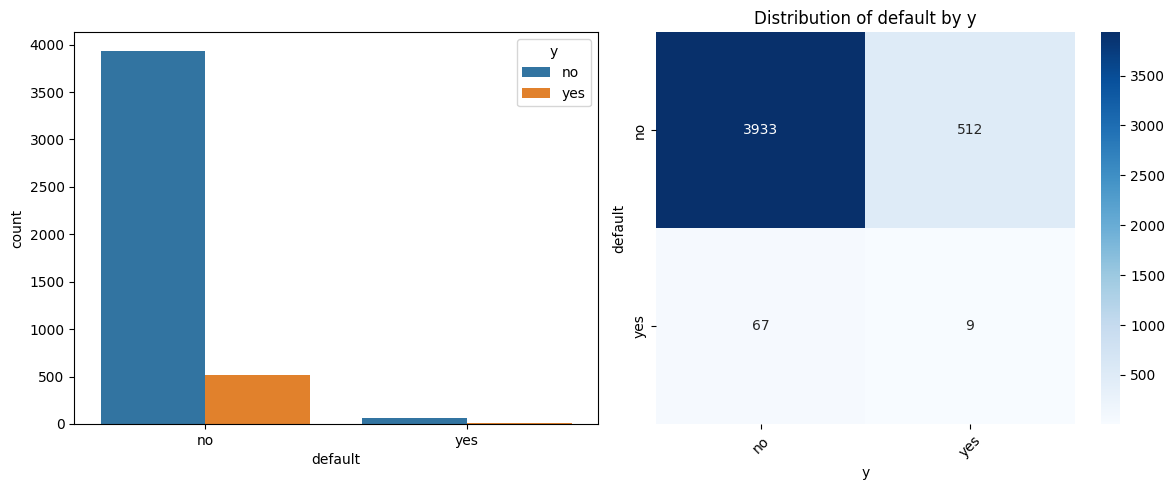

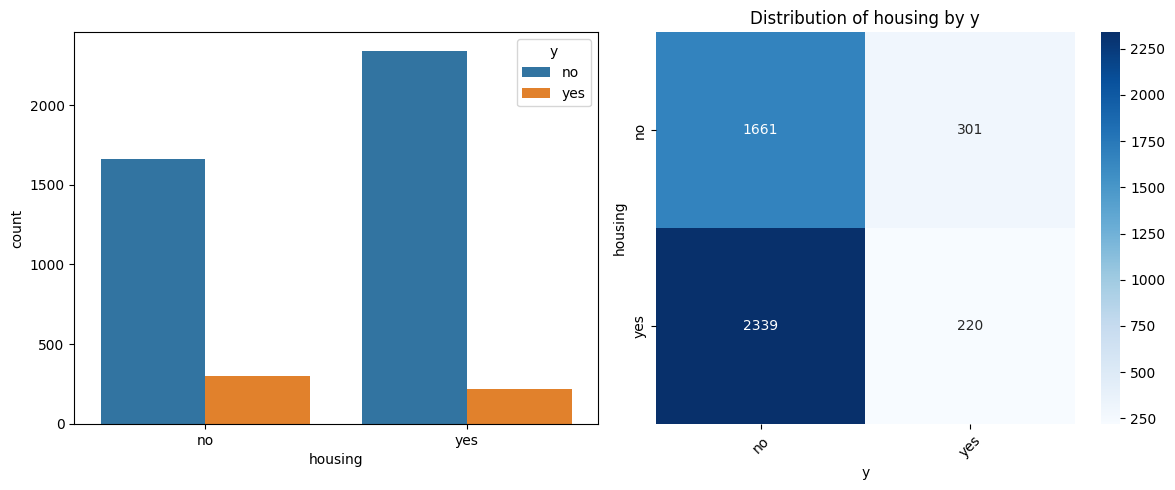

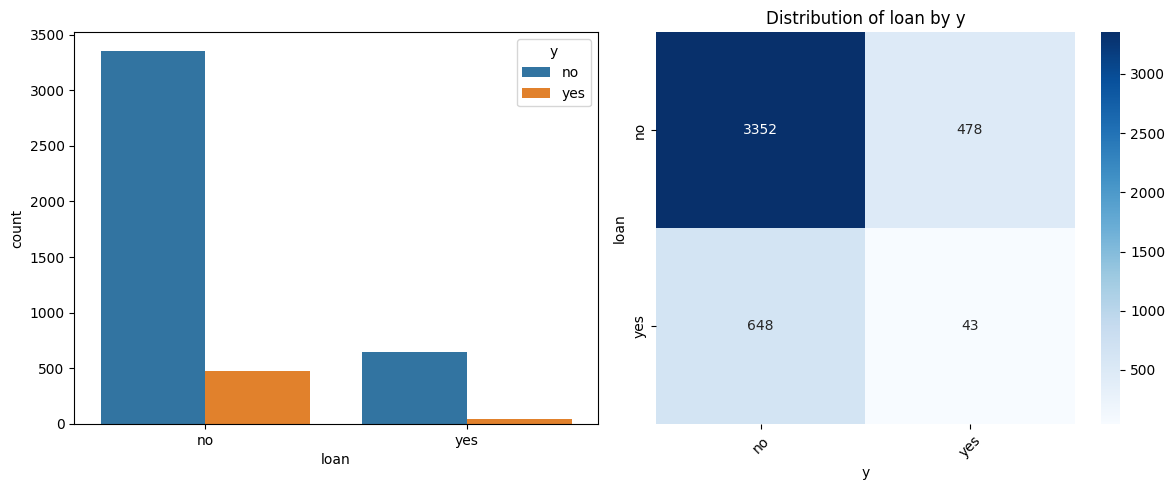

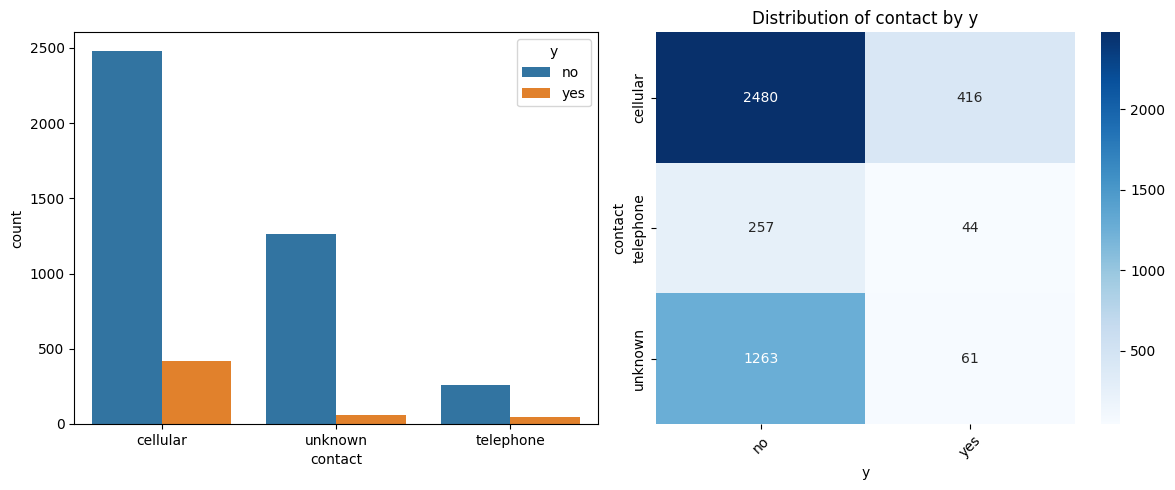

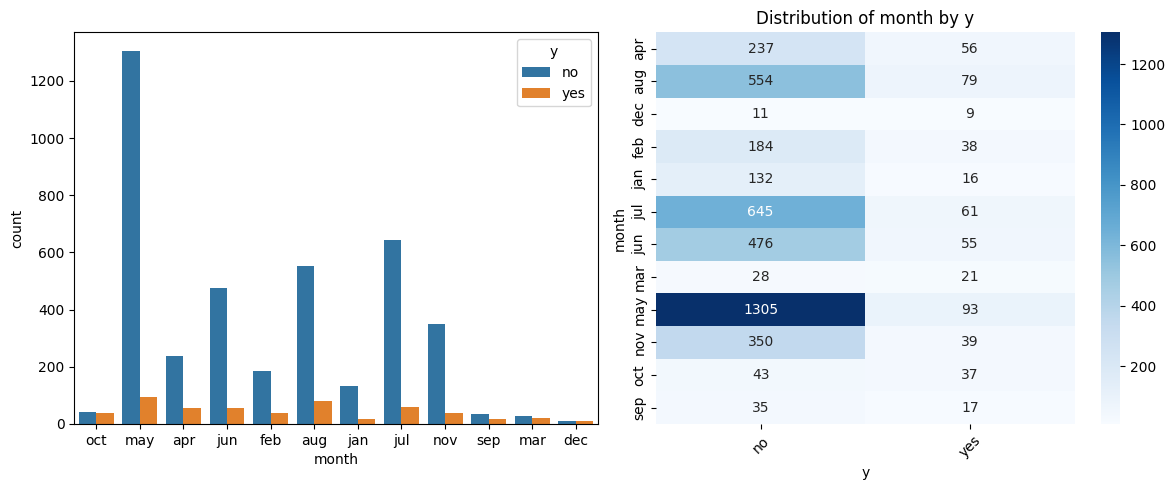

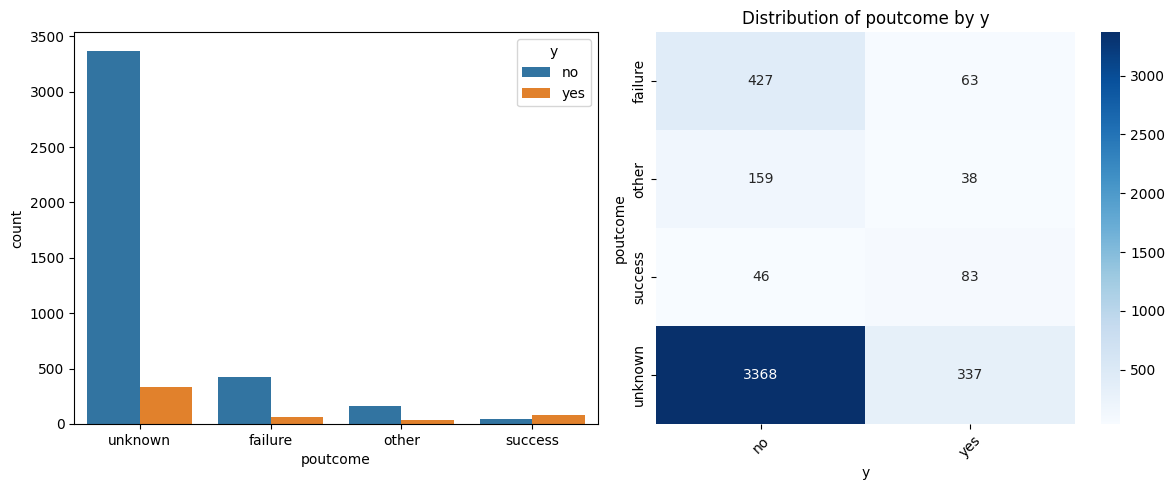

In [6]:
def drawBoxPlotBiVarient(df, target, feature):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'Boxplot of {feature} by {target}')
    plt.show()

# df.columns
for col in num_cols :
    drawBoxPlotBiVarient(df, 'y', col)

def drawcategoricalPlotsBiVarient(df, feature, target):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns


    # plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue=target, ax=axes[0])

    cross_tab = pd.crosstab(df[feature], df[target])
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', ax=axes[1])

    plt.title(f'Distribution of {feature} by {target}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


for col in cat_cols :
    if col != 'y':
        drawcategoricalPlotsBiVarient(df, col,'y')


**Key Takeaway:**  
- Age & DDA deposited request may not be quite dependent, other factors must be considered for accurate classification.
- Higher balances (>1300) has more changes of deposit rate.
- Longer duration (>300sec) has more changes of deposit rate, however there are outliners.
- Married/Folks with secondary education has higher chances of applying for deposit.
- pdays & previous has some high correlation(50%)


### 7. Multivariate Analysis (10 marks)
- Check for correlations between numerical features.
- Perform pairwise analysis using pair plots or correlation matrices.

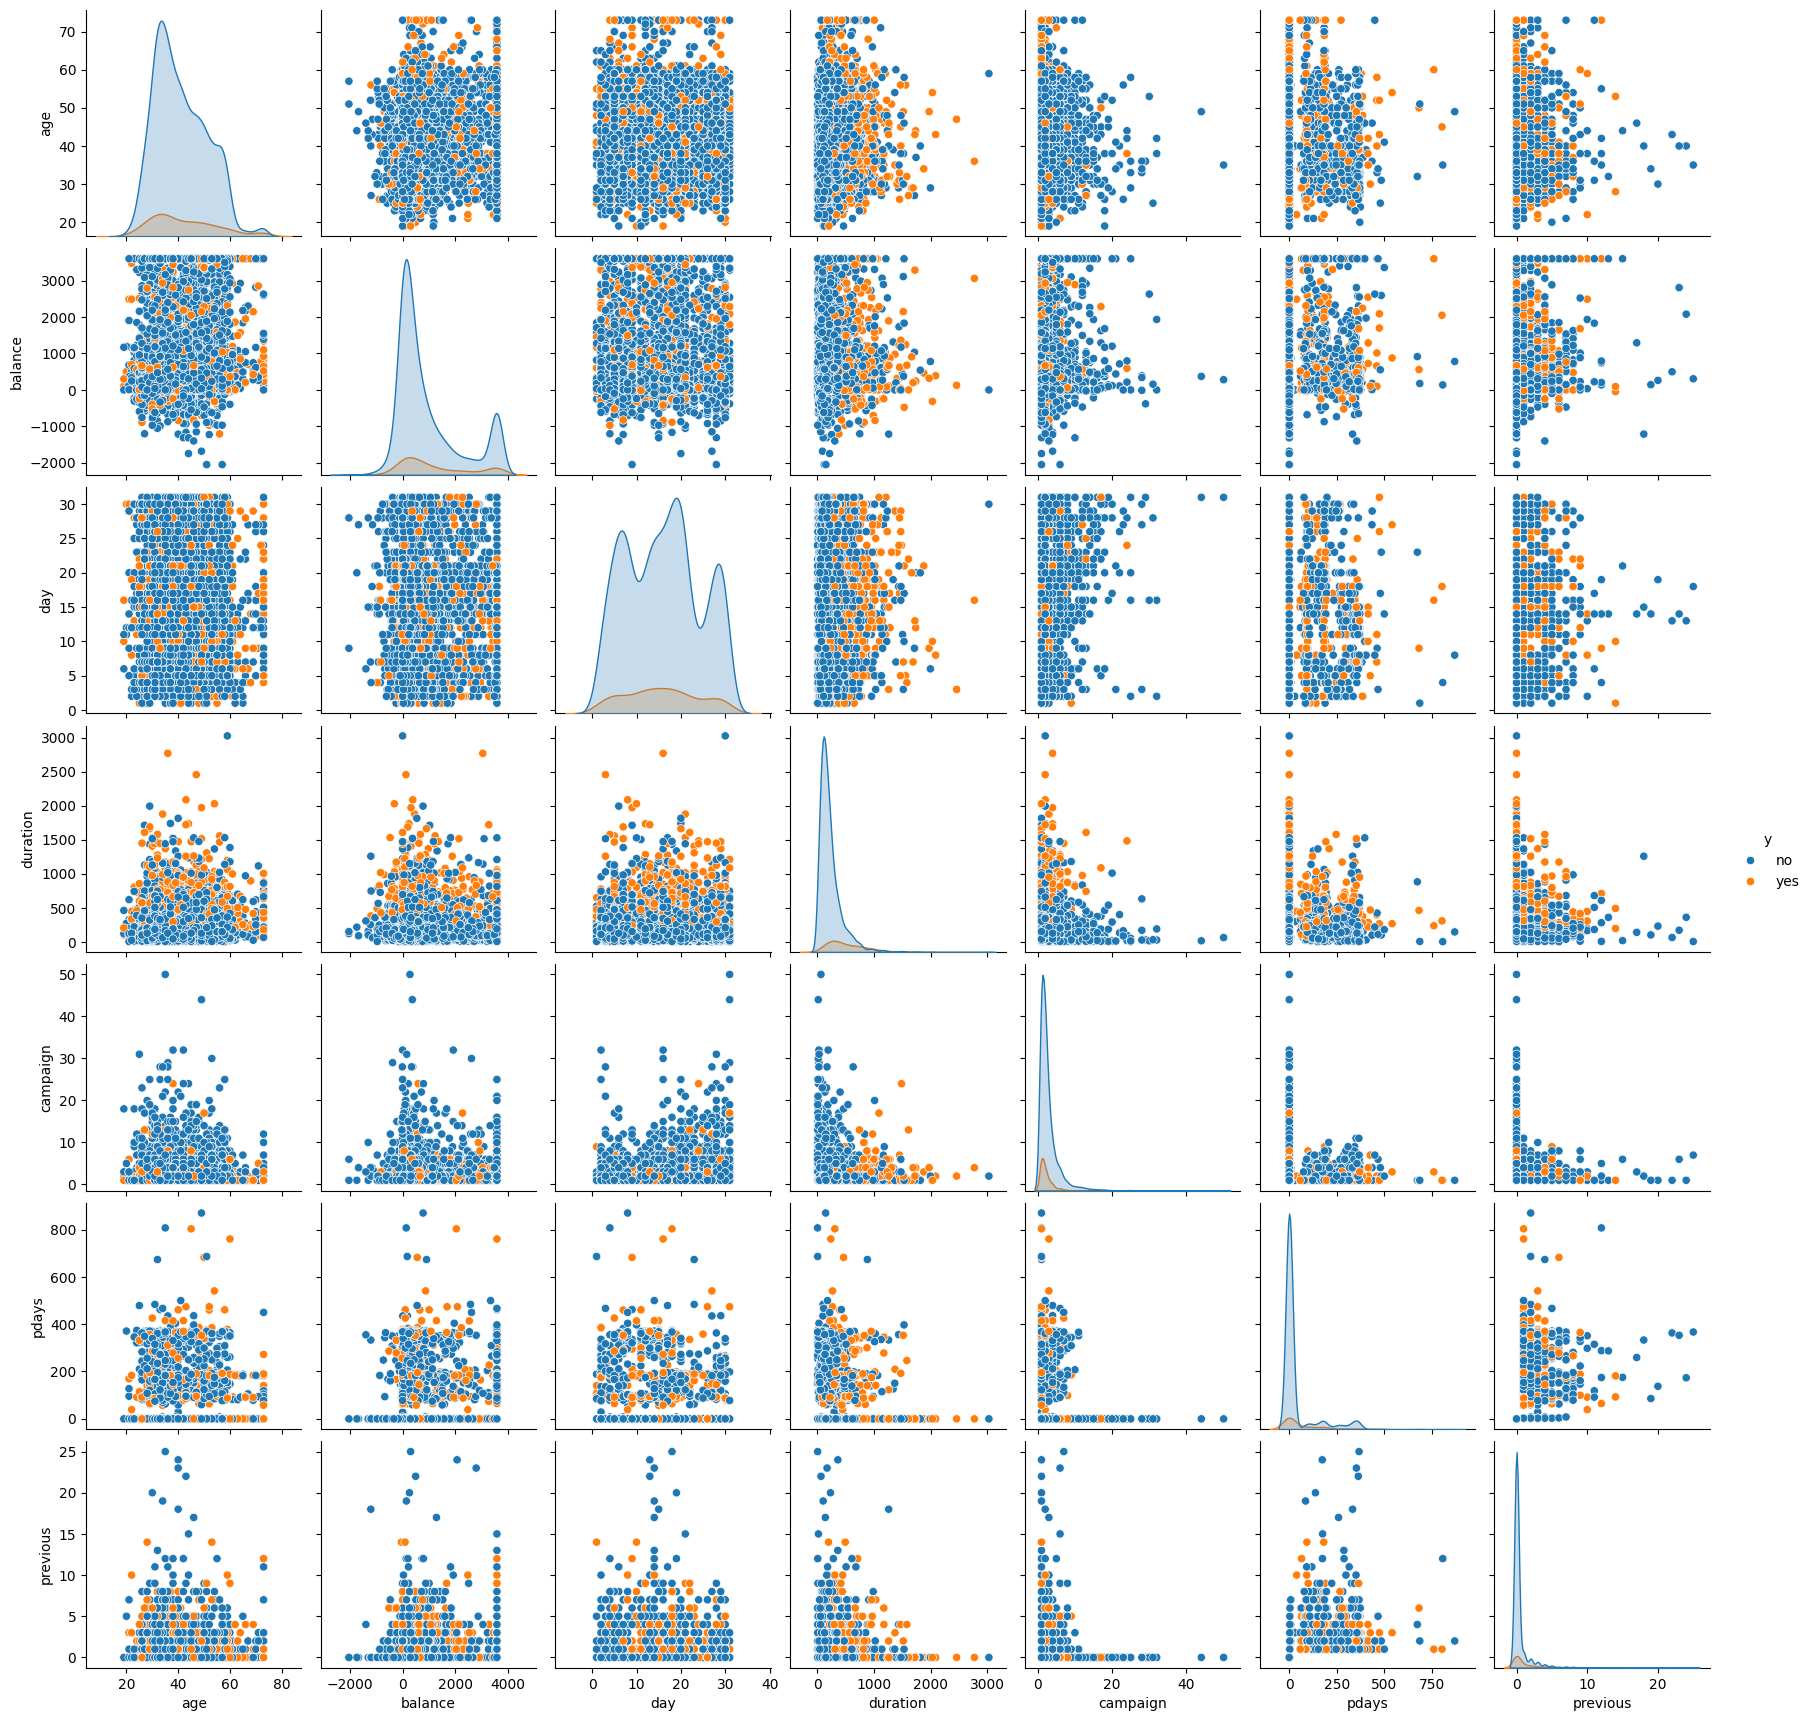

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.092241,-0.018267,-0.004017,-0.005000,-0.009965,-0.005960
balance,0.092241,1.000000,0.003111,0.014906,-0.018666,0.015133,0.038871
day,-0.018267,0.003111,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.004017,0.014906,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005000,-0.018666,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.009965,0.015133,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.005960,0.038871,-0.059114,0.018080,-0.067833,0.577562,1.000000


Text(0.5, 1.0, 'Correlation Matrix for Numerical Columns')

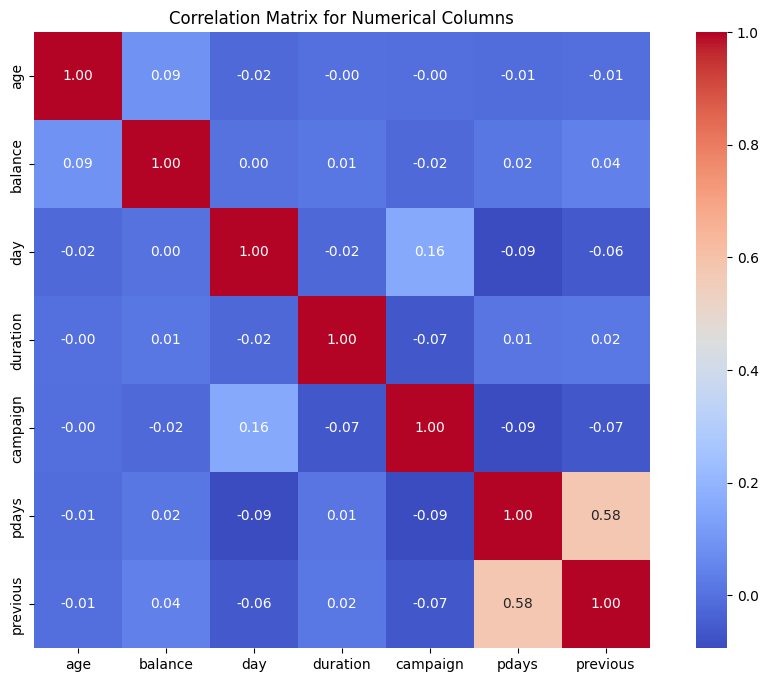

In [7]:
sns.pairplot(df, hue='y')
plt.show()

# Correlation matrix for numerical columns
corr_matrix = df[num_cols].corr()
display(corr_matrix)
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Numerical Columns')   

### 8. Heatmap & Correlation Analysis (10 marks)
- Generate a heatmap to visualize feature correlations.
- Interpret the results to understand feature dependencies.

***###*** Observations
- Except for previous & pday there isn't good co-relation with the data.
- All of the other parameters has weak co-relation.


### 9. Build Logistic Regression Model (15 marks)
- Split the data into training and testing sets.
- Train a logistic regression model on the training data.
- Display the model coefficients and intercept.

In [8]:
#  categorical columns label encoding
labelEncoder = LabelEncoder()
for col in cat_cols :
    if col != 'y':
        df[col] = labelEncoder.fit_transform(df[col])
        print(f" label encoding for {col} : {df[col].value_counts()}")
    else:
        df['y']= df['y'].map({'yes': 1, 'no': 0})
        print(df['y'].value_counts())


 label encoding for job : job
4     969
1     946
9     768
0     478
7     417
5     230
6     183
2     168
10    128
3     112
8      84
11     38
Name: count, dtype: int64
 label encoding for marital : marital
1    2797
2    1196
0     528
Name: count, dtype: int64
 label encoding for education : education
1    2306
2    1350
0     678
3     187
Name: count, dtype: int64
 label encoding for default : default
0    4445
1      76
Name: count, dtype: int64
 label encoding for housing : housing
1    2559
0    1962
Name: count, dtype: int64
 label encoding for loan : loan
0    3830
1     691
Name: count, dtype: int64
 label encoding for contact : contact
0    2896
2    1324
1     301
Name: count, dtype: int64
 label encoding for month : month
8     1398
5      706
1      633
6      531
9      389
0      293
3      222
4      148
10      80
11      52
7       49
2       20
Name: count, dtype: int64
 label encoding for poutcome : poutcome
3    3705
0     490
1     197
2     129
Name: coun

In [9]:

X = df.drop(columns=['y'])
y = df['y']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print(f" model coefficients {model.coef_}")
print(f" model intercept {model.intercept_}")



 model coefficients [[ 0.11966655  0.01890524  0.03153099  0.11481285  0.07035383  0.15053587
  -0.38653586 -0.2943332  -0.52763953  0.02490444  0.02424173  1.03307308
  -0.33039856  0.27087761  0.18757209  0.21331053]]
 model intercept [-2.64661694]


### 11. Interpretation of Metrics (10 marks)
- Analyze the model's performance based on the evaluation metrics.
- Explain any trade-offs observed in precision and recall.


In [10]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[791  16]
 [ 78  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.56      0.20      0.30        98

    accuracy                           0.90       905
   macro avg       0.73      0.59      0.62       905
weighted avg       0.87      0.90      0.87       905

Accuracy Score: 0.8961325966850828


- **True Positives (TP) = 20** → Class 1 correctly predicted as 1.  
- **True Negatives (TN) = 791** → Class 0 correctly predicted as 0.  
- **False Positives (FP) = 16** → Class 0 misclassified as 1.  
- **False Negatives (FN) = 78**  → Class 1 misclassified as 0.  

- **Accuracy = 89%** → Overall, the model correctly classifies **89%** of the samples.

**Precision:**  
  - For Class 0: **91%** of predicted Class 0 instances are actually Class 0.  
  - For Class 1: **56%** of predicted Class 1 instances are actually Class 1.  
  - **Lower precision for Class 1** suggests some misclassifications of Class 0 as Class 1 (False Positives).  

**Recall:**  
  - For Class 0: **98%** of actual Class 0 instances are correctly identified.  
  - For Class 1: **20%** of actual Class 1 instances are correctly identified.  
  - **Lower recall for Class 1** suggests that many positive cases  are being misclassified as negative (False Negatives).  

**F1-score:**  
  - Lower for Class 1 (**0.94**) compared to Class 0 (**0.30**), indicating an **imbalance in performance between classes**.  

  #### **3. Macro & Weighted Averages**
- **Macro Avg (0.62 F1-score)** → Un equal weighting for both classes, revealing **class imbalance issues** (Class 1 is underperforming).  
- **Weighted Avg (0.87 F1-score)** → Accounts for class distribution, aligning with overall accuracy.


### **Key Observations:**
1. **Good performance for Class 0  but weaker for Class 1 .**
2. **Lower recall for Class 1 (20%) means many positive cases are missed (False Negatives).**
3. **Potential Issue:** If detecting Class 1 is critical , the model should be improved for better recall.
4. **Possible Improvements:**
   - **Balance the dataset** (oversampling minority class or undersampling majority class).
   - **Adjust classification threshold** (optimize recall vs. precision tradeoff).


### 10. Model Evaluation (10 marks)
- Generate the confusion matrix.
- Compute accuracy, precision, recall, and F1-score.
- Interpret the classification report.

Already shared in above code


### 12. Final Conclusion (5 marks)
- Summarize the key findings from the analysis.
- Provide suggestions for potential improvements or alternative approaches.

---

Already shared in above metrics 